In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("adult.data", delimiter=",", header= None)

# checking if there are any null values in the dataset
data.isnull().values.any()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
# converting categorical data into numerical data.
# data of columns "1", "3", "5", "6", "7", "8", "9", "13" and "14"

data = pd.get_dummies(data, columns= [1, 3, 5, 6, 7, 8, 9, 13, 14], drop_first= True)
# in above code, I applied OneHotEncoding using get_dummies and dropped first column
data.head()

,0,2,4,10,11,12,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,...,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,14_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]].to_numpy()
y.shape

(32561,)

In [29]:
# standardization of the data before applying PCA
scalar = StandardScaler()
scalar.fit(X)
X_scaled = scalar.transform(X) # standard scaled data

In [30]:
# applying PCA with 95% variance
pca = PCA(n_components= 0.95)
pca.fit(X_scaled)
X = pca.transform(X_scaled)
X.shape

(32561, 84)

In [31]:
# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)


In [49]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[6882,  525],
       [ 976, 1386]], dtype=int64)

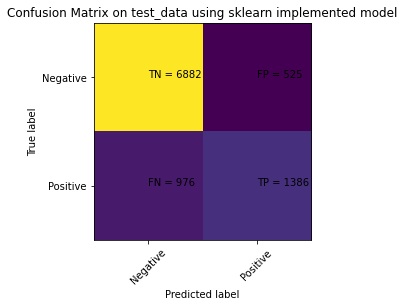

In [50]:
plt.imshow(matrix, interpolation='nearest')
class_names = ["Negative", "Positive"]
plt.title('Confusion Matrix on test_data using sklearn implemented model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
plt.show()

In [33]:
def accuracy(mat):
    TN = mat[0][0]
    TP = mat[1][1]
    FP = mat[0][1]
    FN = mat[1][0]
    accuracy = (TN + TP)/(TN + TP + FN + FP)
    return accuracy

In [34]:
accu_model1 = accuracy(matrix)
accu_model1

0.8463507011976661

In [35]:
import numpy as np
class Log_Reg:
    
    def __init__ (self, lr = 0.001, n_iter = 10000):
        
        # Initilizaing learning rate and no. of iteration
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
    
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bais = 0
        cost_lst = []
        for i in range(self.n_iter):
            
            linear_model = np.dot(X, self.weights) + self.bais
            y_pred = 1 / (1 + np.exp(-linear_model))
            cost = -(1/n_samples)*np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            cost_lst.append(cost)
            dw = (1/n_samples)*np.dot(X.T, (y_pred - y))
            db = (1/n_samples)*np.sum(y_pred - y)
            
            self.weights -= self.lr*dw
            self.bais -= self.lr*db
            
        
            
    def predict(self, X):
        
        linear_model = np.dot(X, self.weights) + self.bais
        y_pred =  1 /(1 + np.exp(-linear_model))
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        
        return y_pred 

In [36]:
model2 = Log_Reg()
model2.fit(X_train, y_train)
y_pred1 = model2.predict(X_test)

In [48]:
matrix2 = confusion_matrix(y_test, y_pred1)
matrix2

array([[6757,  650],
       [ 903, 1459]], dtype=int64)

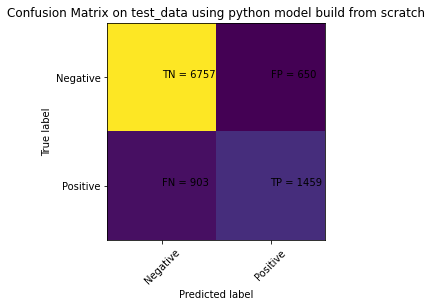

In [51]:
plt.clf
plt.imshow(matrix2, interpolation='nearest')
class_names = ["Negative", "Positive"]
plt.title('Confusion Matrix on test_data using python model build from scratch')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix2[i][j]))
plt.show()

In [38]:
accu_model2 = accuracy(matrix)
accu_model2


0.8410277408127751